# Group details

## Data import

In [63]:
#Importing loan df into python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from IPython.display import display, HTML
import re
loan = pd.read_csv("C:/Users/Shashank/Downloads/IIIB AIML/Lenders Club Case Study/loan.csv")
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

### Loaded df analysis

In [47]:
pd.DataFrame(loan.dtypes).loc[lambda df: df[0].eq('object')]

0
term                 object
int_rate             object
grade                object
sub_grade            object
emp_title            object
emp_length           object
home_ownership       object
verification_status  object
issue_d              object
loan_status          object
pymnt_plan           object
url                  object
desc                 object
purpose              object
title                object
zip_code             object
addr_state           object
earliest_cr_line     object
revol_util           object
initial_list_status  object
last_pymnt_d         object
last_credit_pull_d   object
application_type     object

# Data Scouting

In [64]:
pd.DataFrame.from_records([
('term', (loan.term.unique()), 'convert to int'),
('int_rate', (loan.int_rate.unique()[:10]), 'in pct'),
('grade', (loan.grade.unique()), 'looks as ordered category'),
('sub_grade', (loan.sub_grade.unique()), 'looks as ordered category'),
('emp_length', (loan.emp_length.unique()), 'convert to ordered category'),
('home_ownership', (loan.home_ownership.unique()), ''),
('verification_status', (loan.verification_status.unique()), ''),
], columns=['Column', 'Sample Uniques', 'Prognosis'])

Column                                     Sample Uniques  \
0                 term                           [ 36 months,  60 months]   
1             int_rate  [10.65%, 15.27%, 15.96%, 13.49%, 12.69%, 7.90%...   
2                grade                              [B, C, A, E, F, D, G]   
3            sub_grade  [B2, C4, C5, C1, B5, A4, E1, F2, C3, B1, D1, A...   
4           emp_length  [10+ years, < 1 year, 1 year, 3 years, 8 years...   
5       home_ownership                 [RENT, OWN, MORTGAGE, OTHER, NONE]   
6  verification_status          [Verified, Source Verified, Not Verified]   

                     Prognosis  
0               convert to int  
1                       in pct  
2    looks as ordered category  
3    looks as ordered category  
4  convert to ordered category  
5                               
6

In [49]:
pd.DataFrame.from_records([
('issue_d', (loan.issue_d.unique()[:10]), 'mon-yy'),
('loan_status', (loan.loan_status.unique()), ''),
('pymnt_plan', (loan.pymnt_plan.unique()), ''),
('url', (loan.url.unique()[:5]), 'urls to each loan file'),
('url', (loan.url.str.replace(re.compile('loan_id\=\d+'), '').unique()[:10]), 'drop'),
], columns=['Column', 'Sample Uniques', 'Prognosis'])

Column                                     Sample Uniques  \
0      issue_d  [12/11/2019, 11/11/2019, 10/11/2019, 9/11/2019...   
1  loan_status                 [Fully Paid, Charged Off, Current]   
2   pymnt_plan                                                [n]   
3          url  [https://lendingclub.com/browse/loanDetail.act...   
4          url  [https://lendingclub.com/browse/loanDetail.act...   

                Prognosis  
0                  mon-yy  
1                          
2                          
3  urls to each loan file  
4                    drop

In [50]:
pd.DataFrame.from_records([
('desc', (loan.desc.head(5).str[:100].unique()), 'loan reason, needs parsing, drop'),
('purpose', (loan.purpose.unique()), ''),
('title', (loan.title.unique()), 'short loan reason'),
], columns=['Column', 'Sample Uniques', 'Prognosis'])

Column                                     Sample Uniques  \
0     desc  [  Borrower added on 12/22/11 > I need to upgr...   
1  purpose  [credit_card, car, small_business, other, wedd...   
2    title  [Computer, bike, real estate business, persone...   

                          Prognosis  
0  loan reason, needs parsing, drop  
1                                    
2                 short loan reason

In [51]:
pd.DataFrame.from_records([
('zip_code', (loan.zip_code.unique()[:10]), ''),
('addr_state', (loan.addr_state.unique()[:10]), ''),
('earliest_cr_line', (loan.earliest_cr_line.unique()[:10]), 'mon-yy'),
('revol_util', (loan.revol_util.unique()[:10]), 'in pct'),
], columns=['Column', 'Sample Uniques', 'Prognosis'])

Column                                     Sample Uniques  \
0          zip_code  [860xx, 309xx, 606xx, 917xx, 972xx, 852xx, 280...   
1        addr_state           [AZ, GA, IL, CA, OR, NC, TX, VA, MO, CT]   
2  earliest_cr_line  [1/1/1985, 4/1/1999, 11/1/2019, 2/1/1996, 1/1/...   
3        revol_util  [83.70%, 9.40%, 98.50%, 21%, 53.90%, 28.30%, 8...   

  Prognosis  
0            
1            
2    mon-yy  
3    in pct

In [53]:
pd.DataFrame.from_records([
('initial_list_status', (loan.initial_list_status.unique()[:10]), 'drop'),
('last_pymnt_d', (loan.last_pymnt_d.unique()[:10]), 'mon-yy'),
('next_pymnt_d', (loan.next_pymnt_d.unique()[:10]), 'mon-yy'),
('last_credit_pull_d', (loan.last_credit_pull_d.unique()[:10]), 'mon-yy'),
('application_type', (loan.application_type.unique()[:10]), 'all are INDIVIDUAL'),
], columns=['Column', 'Sample Uniques', 'Prognosis'])

Column                                     Sample Uniques  \
0  initial_list_status                                                [f]   
1         last_pymnt_d  [1/15/2019, 4/13/2019, 6/14/2019, 5/16/2019, 4...   
2         next_pymnt_d                            [nan, 43632.0, 43662.0]   
3   last_credit_pull_d  [5/16/2019, 9/13/2019, 4/16/2019, 1/16/2019, 1...   
4     application_type                                       [INDIVIDUAL]   

            Prognosis  
0                drop  
1              mon-yy  
2              mon-yy  
3              mon-yy  
4  all are INDIVIDUAL

# Data cleanup
## csv file format made consistent using excel 
## identified and changed type of columns using python

Clean up int_rate: Interest Rate on the loan

Clean up revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit

In [65]:
if loan.int_rate.dtype == 'object':
    loan.int_rate = loan.int_rate.str.rstrip('%').astype(np.float64)
    loan.revol_util = loan.revol_util.str.rstrip('%').astype(np.float64)
loan.loc[:, ['int_rate', 'revol_util']].head(3)

int_rate  revol_util
0     10.65        83.7
1     15.27         9.4
2     15.96        98.5

In [61]:
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade  ... recoveries  \
0     10.65       162.87     B        B2  ...       0.00   
1     15.27        59.83     C        C4  ...     117.08   
2     15.96        84.33     C        C5  ...       0.00   
3     13.49       339.31     C        C1  ...       0.00   
4     12.69        67.79     B        B5  ...       0.00   

  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                    0.00    1/15/2019           171.62          NaN   
1                    1.11    4/13/2019           119.66          NaN   
2                    0.00    6/14/2019           649.91          NaN   
3                    0.00    1/15/2019           357.48          NaN   
4                    0.00    5/16/2019            67.79      43632.0   

  last_credit_pull_d collections_12_mths_ex_med chargeoff_within_12_mths  \
0          5/16/2019                        0.0                      0.0   
1          9/13/2019                        0.0                      0.0   
2          5/16/2019                        0.0                      0.0   
3          4/16/2019                        0.0                      0.0   
4          5/16/2019                        0.0                      0.0   

  pub_rec_bankruptcies tax_liens  
0                  0.0       0.0  
1                  0.0       0.0  
2                  0.0       0.0  
3                  0.0       0.0  
4                  0.0       0.0  

[5 rows x 51 columns]

Columns that are have only one value. A column having a single value does not cause segmentation of the data and is therefore, not useful for analysis.

In [66]:
singles = pd.Index([col for col in loan.columns if len(loan[col].unique()) == 1])
len(singles), singles

(60, Index(['pymnt_plan', 'initial_list_status', 'mths_since_last_major_derog',
        'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
        'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
        'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
        'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
        'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
        'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
        'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
        'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
        'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
        'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
        'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
        'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
        'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
        'num_rev_accts', 'num_

In [67]:
loan.drop(columns=singles, inplace=True)

#### Finally, the columns that are left with for analyzing drivers of debt default are as follows

In [68]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

Add a `counter` column to count aggregates at various levels

In [69]:
loan = loan.assign(counter=int(1))

#### Analysis based on customer provided data

In [70]:
# location_grouper = ['addr_state', 'zip_code']
# location_grouper = ['addr_state']
location_grouper = ['purpose', 'title']

In [71]:
def analyze_defaults(grouper):
    return (pd.pivot_table(data=loan, index=grouper, values=['counter'], columns=['loan_status'],
              aggfunc='count')
       .assign(**{'Defaults/All Loans %':
                  lambda df: np.round(df[('counter', 'Charged Off')] / df['counter'].sum(axis=1).sum() * 100, 2)})
       .assign(**{'Defaults/All Defaults %':
                  lambda df: np.round(df[('counter', 'Charged Off')] * 100 / df[('counter', 'Charged Off')].sum(), 2)})
       .assign(**{'Defaults/Loans %':
                  lambda df: np.round(df[('counter', 'Charged Off')] * 100 / df['counter'].sum(axis=1), 2)})
       .assign(**{'Loans/All Loans %':
                  lambda df: np.round(df['counter'].sum(axis=1) / df['counter'].sum(axis=1).sum() * 100, 2)})
       .sort_values(['Defaults/All Loans %', 'Defaults/All Defaults %', 'Defaults/Loans %'], ascending=False)
    )

In [72]:
#Pivot based on Purpose and Title and default percentages acrosss various parameters
analyze_defaults(['purpose', 'title']).head(12)

counter                     \
loan_status                                Charged Off Current Fully Paid   
purpose            title                                                    
debt_consolidation Debt Consolidation            283.0    89.0     1662.0   
                   Debt Consolidation Loan       270.0   109.0     1303.0   
small_business     Small Business Loan            95.0    23.0      208.0   
debt_consolidation debt consolidation             93.0    25.0      359.0   
                   Debt consolidation             54.0    11.0      244.0   
other              Personal Loan                  46.0    10.0      186.0   
debt_consolidation Consolidation                  45.0    21.0      388.0   
home_improvement   Home Improvement               43.0     8.0      270.0   
other              Other Loan                     36.0    11.0      144.0   
debt_consolidation consolidation                  35.0    11.0      125.0   
                   Consolidation Loan             35.0     7.0      188.0   
                   Personal Loan                  33.0     7.0      222.0   

                                           Defaults/All Loans %  \
loan_status                                                       
purpose            title                                          
debt_consolidation Debt Consolidation                      0.71   
                   Debt Consolidation Loan                 0.68   
small_business     Small Business Loan                     0.24   
debt_consolidation debt consolidation                      0.23   
                   Debt consolidation                      0.14   
other              Personal Loan                           0.12   
debt_consolidation Consolidation                           0.11   
home_improvement   Home Improvement                        0.11   
other              Other Loan                              0.09   
debt_consolidation consolidation                           0.09   
                   Consolidation Loan                      0.09   
                   Personal Loan                           0.08   

                                           Defaults/All Defaults %  \
loan_status                                                          
purpose            title                                             
debt_consolidation Debt Consolidation                         5.03   
                   Debt Consolidation Loan                    4.80   
small_business     Small Business Loan                        1.69   
debt_consolidation debt consolidation                         1.65   
                   Debt consolidation                         0.96   
other              Personal Loan                              0.82   
debt_consolidation Consolidation                              0.80   
home_improvement   Home Improvement                           0.76   
other              Other Loan                                 0.64   
debt_consolidation consolidation                              0.62   
                   Consolidation Loan                         0.62   
                   Personal Loan                              0.59   

                                           Defaults/Loans % Loans/All Loans %  
loan_status                                                                    
purpose            title                                                       
debt_consolidation Debt Consolidation                 13.91              5.12  
                   Debt Consolidation Loan            16.05              4.24  
small_business     Small Business Loan                29.14              0.82  
debt_consolidation debt consolidation                 19.50              1.20  
                   Debt consolidation                 17.48              0.78  
other              Personal Loan                      19.01              0.61  
debt_consolidation Consolidation                       9.91              1.14  
home_improvement   Home Improvemen

In [73]:
#Pivot based on Country and various default paramters
analyze_defaults(['addr_state'])#.std()

counter                    Defaults/All Loans %  \
loan_status Charged Off Current Fully Paid                        
addr_state                                                        
CA               1125.0   150.0     5824.0                 2.83   
FL                504.0    85.0     2277.0                 1.27   
NY                495.0   114.0     3203.0                 1.25   
TX                316.0    68.0     2343.0                 0.80   
NJ                278.0    60.0     1512.0                 0.70   
GA                215.0    39.0     1144.0                 0.54   
IL                197.0    47.0     1281.0                 0.50   
PA                180.0    49.0     1288.0                 0.45   
VA                177.0    38.0     1192.0                 0.45   
MD                162.0    26.0      861.0                 0.41   
MA                159.0    43.0     1138.0                 0.40   
OH                155.0    45.0     1023.0                 0.39   
WA                127.0    22.0      691.0                 0.32   
AZ                123.0    30.0      726.0                 0.31   
MO                114.0    16.0      556.0                 0.29   
NC                114.0    38.0      636.0                 0.29   
NV                108.0    18.0      371.0                 0.27   
MI                103.0    16.0      601.0                 0.26   
CO                 98.0    26.0      668.0                 0.25   
CT                 94.0    25.0      632.0                 0.24   
MN                 81.0    10.0      524.0                 0.20   
OR                 71.0    16.0      364.0                 0.18   
SC                 66.0    13.0      393.0                 0.17   
WI                 63.0    20.0      377.0                 0.16   
AL                 54.0    17.0      381.0                 0.14   
LA                 53.0     9.0      374.0                 0.13   
KY                 45.0    14.0      266.0                 0.11   
UT                 40.0     6.0      212.0                 0.10   
OK                 40.0    12.0      247.0                 0.10   
KS                 31.0    16.0      224.0                 0.08   
NM                 30.0     6.0      153.0                 0.08   
HI                 28.0     8.0      138.0                 0.07   
AR                 27.0    10.0      208.0                 0.07   
NH                 25.0     5.0      141.0                 0.06   
RI                 25.0     4.0      169.0                 0.06   
WV                 21.0     5.0      151.0                 0.05   
AK                 15.0     2.0       63.0                 0.04   
DC                 15.0     3.0      196.0                 0.04   
SD                 12.0     2.0       50.0                 0.03   
DE                 12.0     1.0      101.0                 0.03   
MT                 11.0     2.0       72.0                 0.03   
VT                  6.0     1.0       47.0                 0.02   
WY                  4.0     3.0       76.0                 0.01   
NE                  3.0     NaN        2.0                 0.01   
TN                  2.0     NaN       15.0                 0.01   
MS                  2.0     NaN       17.0                 0.01   
ID                  1.0     NaN        5.0                 0.00   
IA                  NaN     NaN        5.0                  NaN   
IN                  NaN     NaN        9.0                  NaN   
ME                  NaN     NaN        3.0                  NaN   

            Defaults/All Defaults % Defaults/Loans % Loans/All Loans %  
loan_status                                                             
addr_state                                                              
CA                            19.99            15.85             17.87  
FL                             8.96            17.59              7.22  
NY                             8.80            12.99              9.60  
TX                        

#### Overall plot based on total loan data

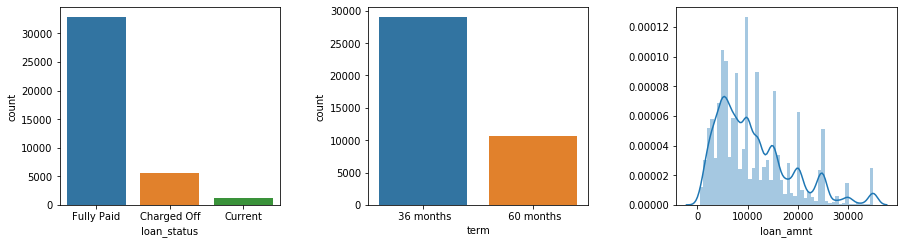

In [74]:
fig, ax = plt.pyplot.subplots(figsize=(15, 8))
fig.subplots_adjust(wspace=0.40)
plt.pyplot.subplot(2,3,1)
sns.countplot(loan.loan_status)
plt.pyplot.subplot(2,3,2)
sns.countplot(loan.term)
plt.pyplot.subplot(2,3,3)
sns.distplot(loan.loan_amnt)

#### Analysis based on `Charged Off ` data

In [75]:
#filtering df to store only Charged-off
loan_chargeoff = loan.loc[loan['loan_status']=='Charged Off']
#loan_chargeoff[['id','annual_inc']]
loan_chargeoff.head(10)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
1   1077430    1314167     2500.0       2500.0           2500.0   60 months   
8   1071795    1306957     5600.0       5600.0           5600.0   60 months   
9   1071570    1306721     5375.0       5375.0           5350.0   60 months   
12  1064687    1298717     9000.0       9000.0           9000.0   36 months   
14  1069057    1303503    10000.0      10000.0          10000.0   36 months   
21  1039153    1269083    21000.0      21000.0          21000.0   36 months   
24  1069559    1304634     6000.0       6000.0           6000.0   36 months   
26  1069800    1304679    15000.0      15000.0           8725.0   36 months   
27  1069657    1304764     5000.0       5000.0           5000.0   60 months   
46  1069465    1304521     5000.0       5000.0           5000.0   36 months   

    int_rate  installment grade sub_grade  ... collection_recovery_fee  \
1      15.27        59.83     C        C4  ...                    1.11   
8      21.28       152.39     F        F2  ...                    2.09   
9      12.69       121.45     B        B5  ...                    2.52   
12     13.49       305.38     C        C1  ...                    4.16   
14     10.65       325.74     B        B2  ...                    6.31   
21     12.42       701.73     B        B4  ...                    0.00   
24     11.71       198.46     B        B3  ...                    2.57   
26     14.27       514.64     C        C2  ...                    0.00   
27     16.77       123.65     D        D2  ...                    2.30   
46      8.90       158.77     A        A5  ...                    1.07   

   last_pymnt_d last_pymnt_amnt  next_pymnt_d last_credit_pull_d  \
1     4/13/2019          119.66           NaN          9/13/2019   
8     4/12/2019          152.39           NaN          8/12/2019   
9    11/12/2019          121.45           NaN          3/13/2019   
12    7/12/2019          305.38           NaN         11/12/2019   
14   10/13/2019          325.74           NaN          3/14/2019   
21    9/13/2019          701.73           NaN          5/16/2019   
24   10/12/2019          198.46           NaN          3/13/2019   
26          NaN            0.00           NaN          5/16/2019   
27   12/12/2019          123.65           NaN          5/13/2019   
46    8/14/2019          158.77           NaN         12/14/2019   

   collections_12_mths_ex_med chargeoff_within_12_mths pub_rec_bankruptcies  \
1                         0.0                      0.0                  0.0   
8                         0.0                      0.0                  0.0   
9                         0.0                      0.0                  0.0   
12                        0.0                      0.0                  0.0   
14                        0.0                      0.0                  0.0   
21                        0.0                      0.0                  0.0   
24                        0.0                      0.0                  0.0   
26                        0.0                      0.0                  0.0   
27                        0.0                      0.0                  0.0   
46                        0.0                      0.0                  0.0   

   tax_liens counter  
1        0.0       1  
8        0.0       1  
9        0.0       1  
12       0.0       1  
14       0.0       1  
21       0.0       1  
24       0.0       1  
26       0.0       1  
27       0.0       1  
46       0.0       1  

[10 rows x 52 columns]

# Univariate and Bivariate analysis 

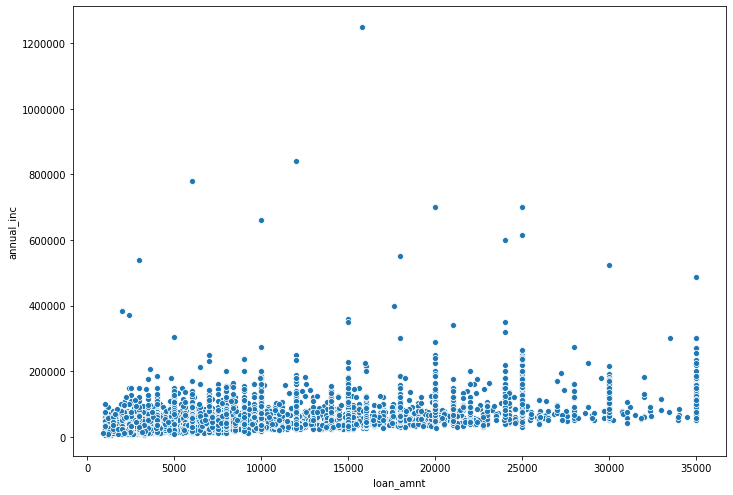

In [77]:
#annual salary and loan amount
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.scatterplot(x="loan_amnt", y="annual_inc", data=loan_chargeoff)

#conclusion - Majority of defaulters are have annual salary less than 300,000

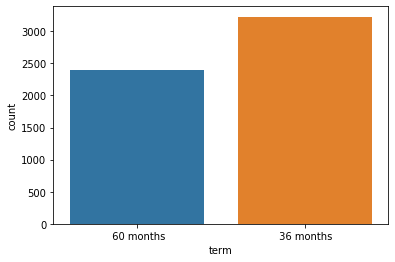

In [78]:
#Tenure of loan that has most defaults
table2 = loan_chargeoff[['term', 'loan_status']]
ax = sns.countplot(x = 'term', data = loan_chargeoff)
#Conclusion: 36 months of loan term has most defaults

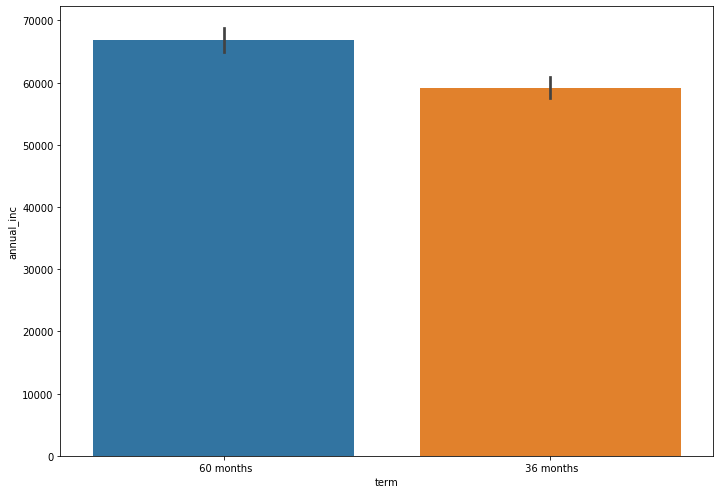

In [79]:
#loan term and annual salary
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.barplot(x="term", y="annual_inc", data=loan_chargeoff)

#conclusion1: on an average, people who take loan for 60 months have better annual income
#Conclusion2: people has less annual salary who take 36 months loan and are unable to pay back. Hence, less salaried people should take loan of more tenure

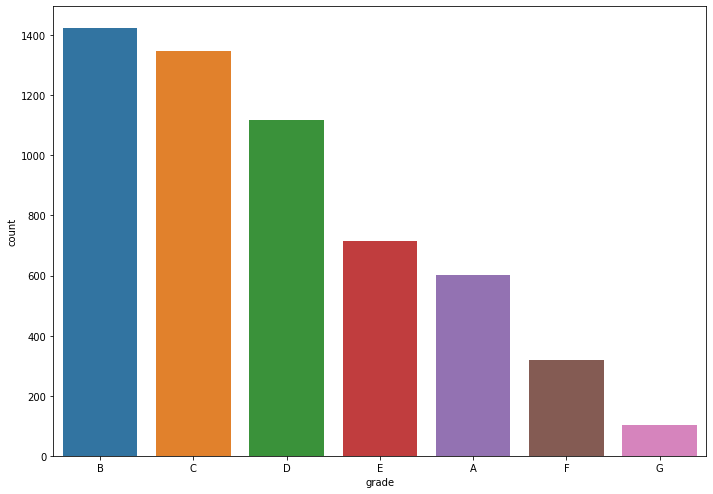

In [81]:
#Grade of loan that has most defaults
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.countplot(x = 'grade', data = loan_chargeoff, order=loan_chargeoff['grade'].value_counts().index)

#conclusion: Grade B and C have more defaults

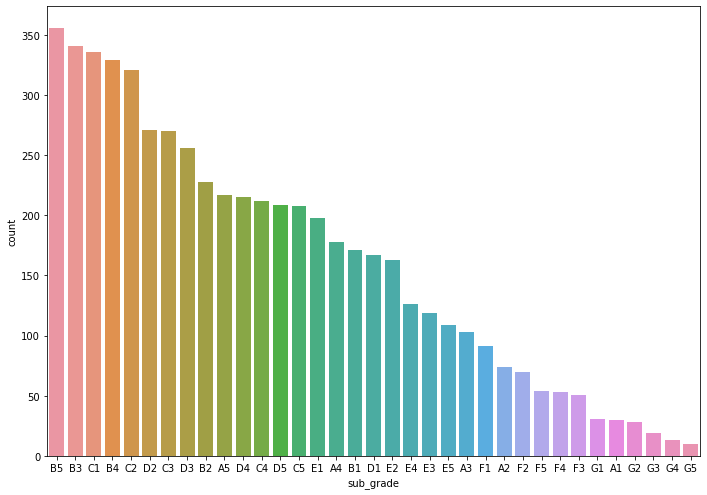

In [83]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.countplot(x = 'sub_grade', data = loan_chargeoff, order=loan_chargeoff['sub_grade'].value_counts().index)

#Conclusion: Most sub-group defaulters are in B5, B3, C1, B4 and C2

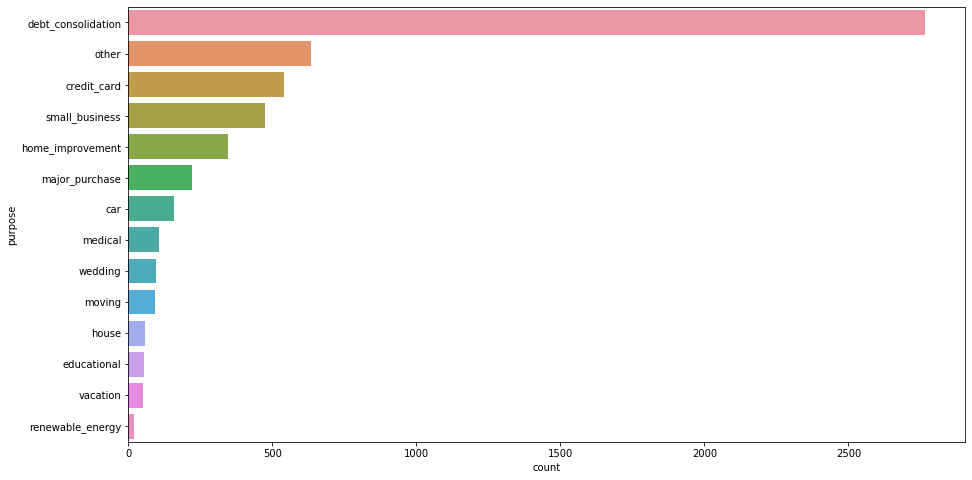

In [97]:
#Purpose of loan that has most defaults
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.countplot(y = 'purpose', data = loan_chargeoff, order=loan_chargeoff['purpose'].value_counts().index)

#Conclusion: in Type b, DEBT CONSOLIDATION is major defaulters

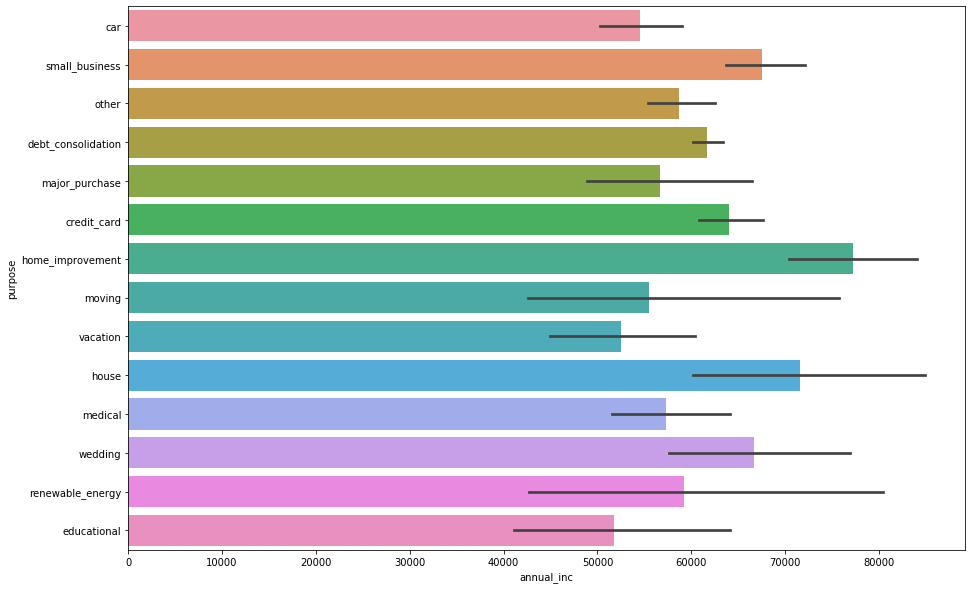

In [111]:
#trend between annual income and purpose
import seaborn as sns
import matplotlib.pyplot as plt
#table2 = loan_chargeoff[['zip_code', 'loan_status']]
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax = sns.barplot(x="annual_inc", y="purpose", data=loan_chargeoff)

#Conclusion: loan taken for home improvement and small business have more annual income on an average

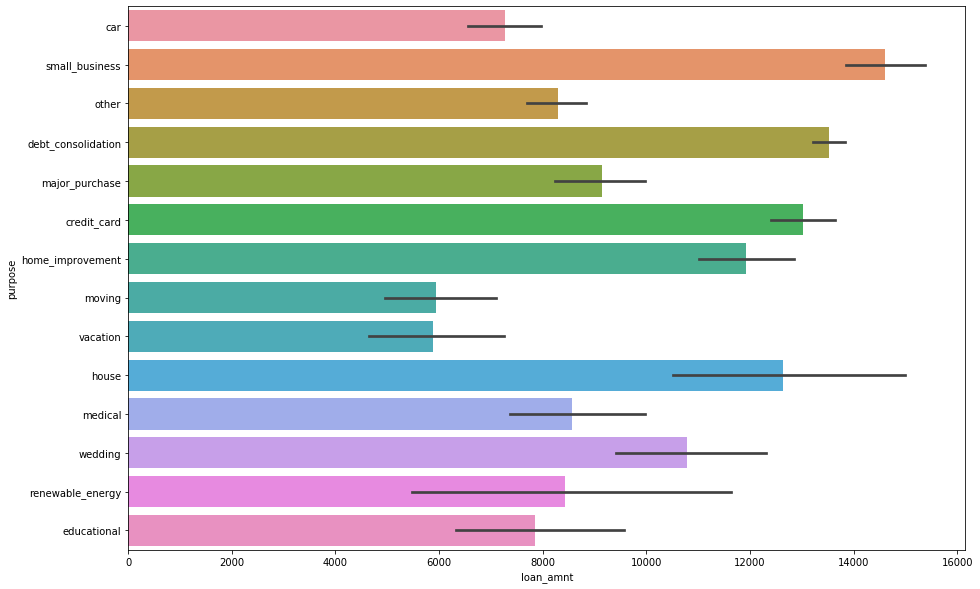

In [112]:
#trend between loan_amount and purpose
import seaborn as sns
import matplotlib.pyplot as plt
#table2 = loan_chargeoff[['zip_code', 'loan_status']]
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax = sns.barplot(x="loan_amnt", y="purpose", data=loan_chargeoff)

#Conclusion: loan taken for home improvement and small business have more annual income. But more loan amount is passed for small business and debt consolidation.

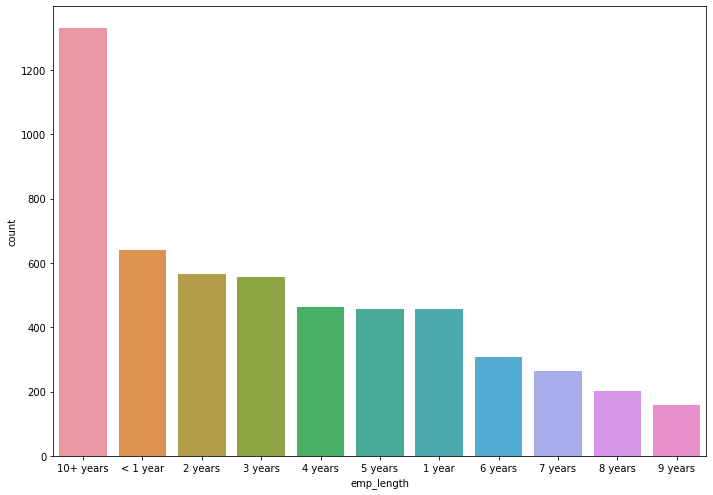

In [85]:
#Year of Experience of loan that has most defaults
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.countplot(x = 'emp_length', data = loan_chargeoff, order=loan_chargeoff['emp_length'].value_counts().index)

#Conclusion: People with 10+ years experience default the most-- it could be people with 10+ ex apply loan most

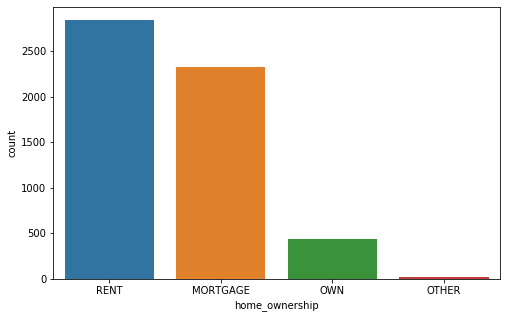

In [87]:
#Home Type of loan that has most defaults
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
ax = sns.countplot(x = 'home_ownership', data = loan_chargeoff, order=loan_chargeoff['home_ownership'].value_counts().index)

#Conclusion: RENT and Mortgage people default most

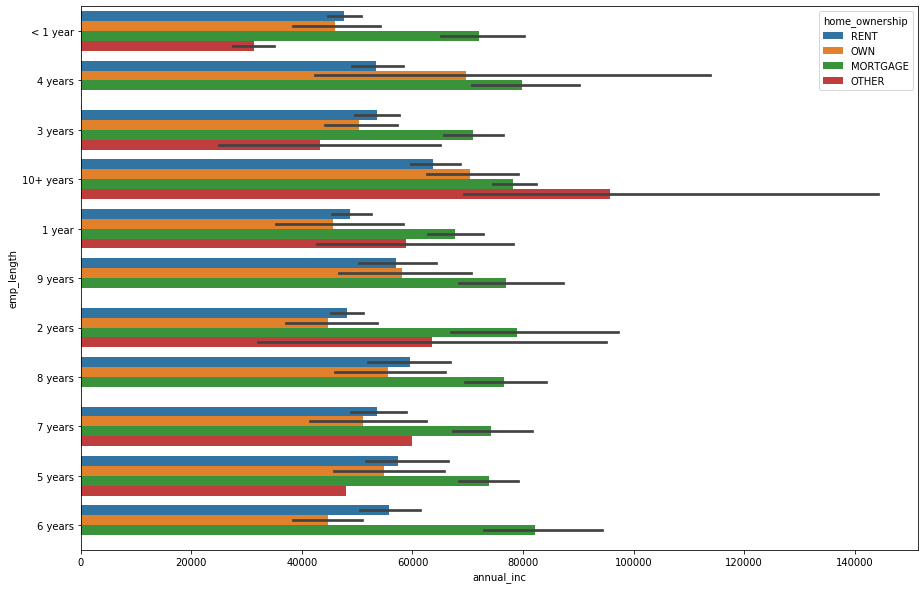

In [109]:
#Home ownership relation with annual income and employment length
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax = sns.barplot(x="annual_inc", y="emp_length",hue= 'home_ownership', data=loan_chargeoff)

#Conclusion: People who have home mortgage tend to default more. Year of experience do not matter

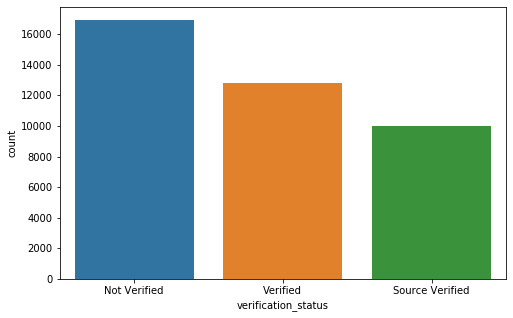

In [89]:
#Verification status of loan that has most defaults
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
ax = sns.countplot(x = 'verification_status', data = loan, order=loan['verification_status'].value_counts().index)

#Conclusion: Verification does not play critical role in loan defaults

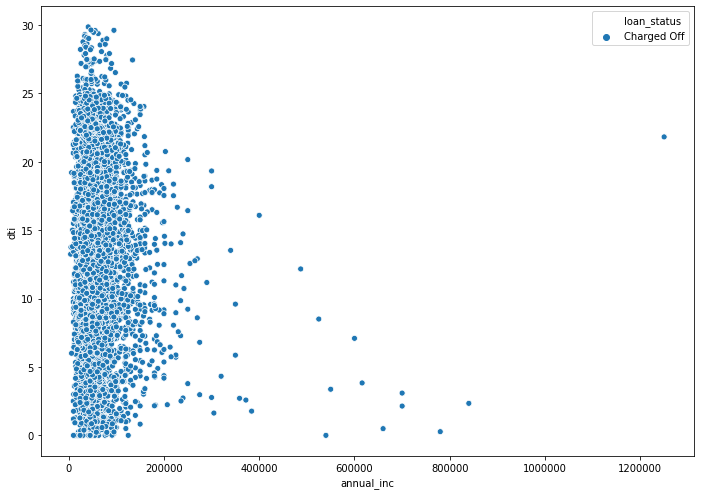

In [98]:
#annual salary and dti
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.scatterplot(x="annual_inc", y="dti", data=loan_chargeoff, hue = 'loan_status')

#conclusion - Higher DTI with less annual income leads to high default rate.

''

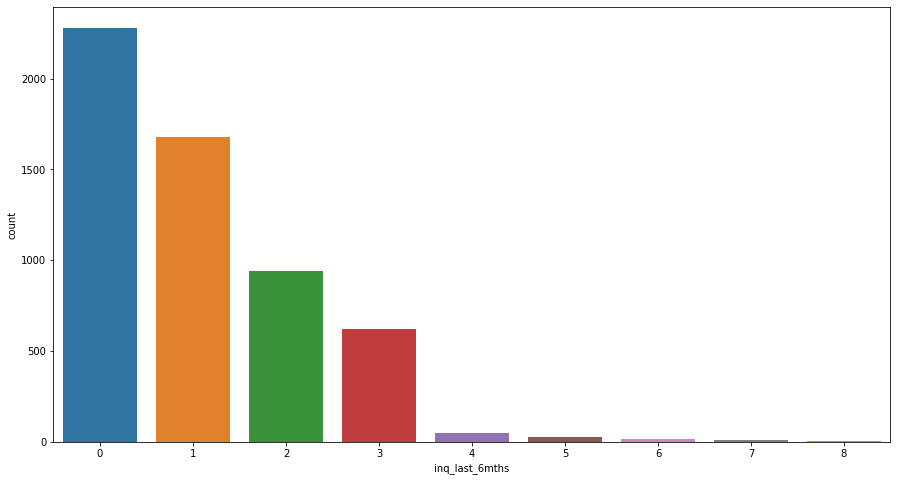

In [103]:
#Purpose of loan that has most defaults
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.countplot(x = 'inq_last_6mths', data = loan_chargeoff, order=loan_chargeoff['inq_last_6mths'].value_counts().index)
;
#Conclusion: Less inquiry in last 6 months tend to more default. More inquiry plan better for less default

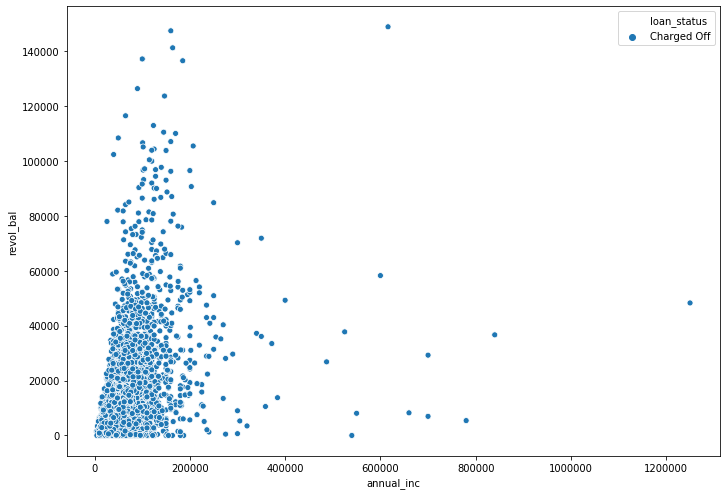

In [104]:
#annual salary and revolving balance
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.scatterplot(x="annual_inc", y="revol_bal", data=loan_chargeoff, hue = 'loan_status')
#ax = sns.boxplot(x="loan_amnt", y="annual_inc", data=loan_chargeoff)

#conclusion - Individuals with annual income upto 200000 and revolving balance less than 60000 tend to default more. So less annual income and more revolving balance can default more

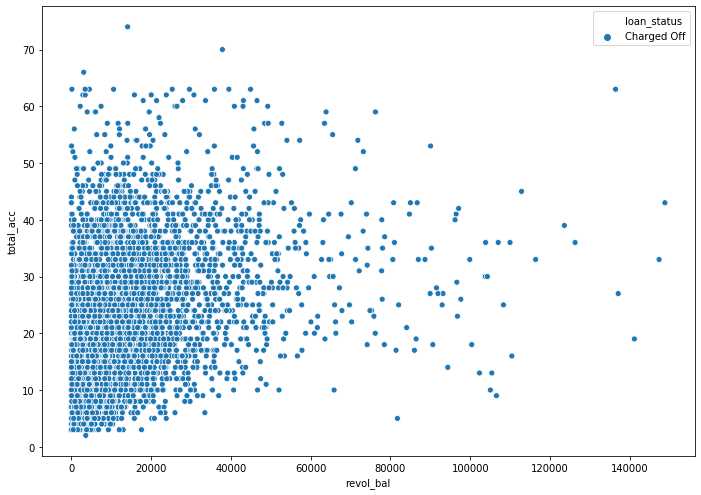

In [107]:
#Revolving Balance and Number of accounts
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.scatterplot(x="revol_bal", y="total_acc", data=loan_chargeoff, hue = 'loan_status')

#conclusion - Revolving Balance is densely spread between 5 to 45 accounts. not of much use

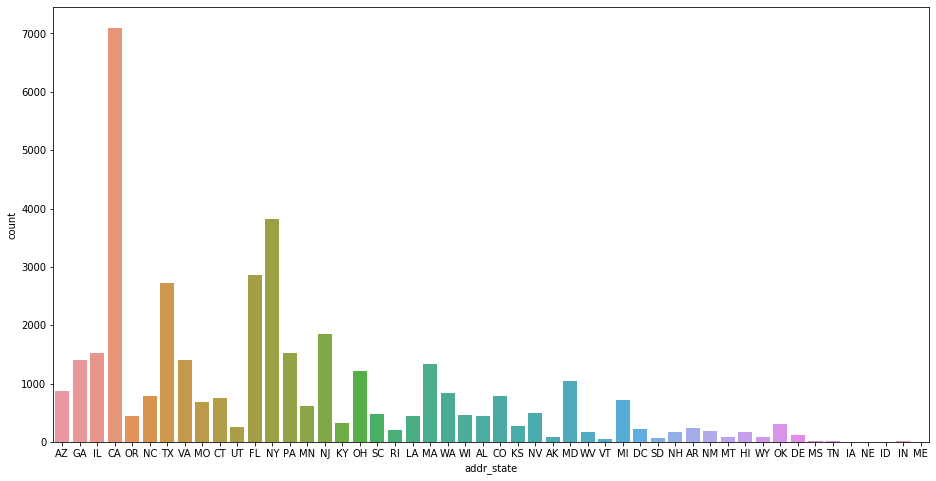

In [108]:
#Loan applied state wise
#sns.countplot(loan.application_type)
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 8)
sns.countplot(x = 'addr_state', data = loan)
#Conclusion: California has most applied loans followed by NY and FL/TX

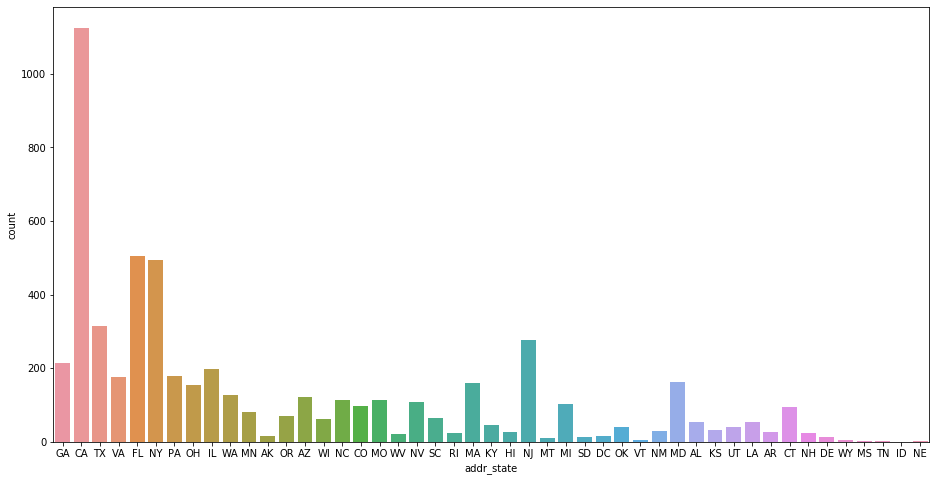

In [113]:
#Loan defaulted state wise
#sns.countplot(loan.application_type)
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 8)
sns.countplot(x = 'addr_state', data = loan_chargeoff)
#Conclusion1: California has most defaulters followed by Florida and NY

#Conclusion on State: Applicants from CA, FL, NY are more likely to default even thoguh there are more loan takers. corelated

Building correlation matrix of important numerical fields

In [117]:
imp_numerics = (loan
        
                .loc[:, ['net_charged_off_amnt', 'grade', 'int_rate', 'loan_amnt', 'annual_inc', 'revol_bal', 
              'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
              'pub_rec', 'delinq_2yrs', 'inq_last_6mths', 'ageof_cr_line', 'loan_status', 'charged_off']]
               )

In [118]:
(imp_numerics
    .assign(grade=imp_numerics.grade.replace(dict(zip(np.sort(loan.grade.unique()), range(1, loan.grade.nunique() + 1)))))
    .corr()
)

net_charged_off_amnt     grade  int_rate  loan_amnt  \
net_charged_off_amnt                   NaN       NaN       NaN        NaN   
grade                                  NaN  1.000000  0.948627   0.290447   
int_rate                               NaN  0.948627  1.000000   0.309415   
loan_amnt                              NaN  0.290447  0.309415   1.000000   
annual_inc                             NaN  0.054913  0.053185   0.271149   
revol_bal                              NaN  0.092717  0.097100   0.317597   
total_pymnt                            NaN  0.288917  0.308268   0.886613   
total_rec_prncp                        NaN  0.169222  0.186882   0.852021   
total_rec_int                          NaN  0.511265  0.529913   0.729726   
total_rec_late_fee                     NaN  0.101354  0.092591   0.044706   
pub_rec                                NaN  0.092311  0.097208  -0.051236   
delinq_2yrs                            NaN  0.163544  0.157916  -0.031864   
inq_last_6mths                         NaN  0.116017  0.133013   0.009229   
ageof_cr_line                          NaN       NaN       NaN        NaN   
charged_off                            NaN       NaN       NaN        NaN   

                      annual_inc  revol_bal  total_pymnt  total_rec_prncp  \
net_charged_off_amnt         NaN        NaN          NaN              NaN   
grade                   0.054913   0.092717     0.288917         0.169222   
int_rate                0.053185   0.097100     0.308268         0.186882   
loan_amnt               0.271149   0.317597     0.886613         0.852021   
annual_inc              1.000000   0.279961     0.257980         0.259571   
revol_bal               0.279961   1.000000     0.293204         0.281419   
total_pymnt             0.257980   0.293204     1.000000         0.971472   
total_rec_prncp         0.259571   0.281419     0.971472         1.000000   
total_rec_int           0.185476   0.243000     0.828758         0.684027   
total_rec_late_fee      0.006243   0.003822     0.012981        -0.019667   
pub_rec                -0.018689  -0.061413    -0.053668        -0.065384   
delinq_2yrs             0.023083  -0.055125    -0.022695        -0.038795   
inq_last_6mths          0.033908  -0.022381    -0.010559        -0.023433   
ageof_cr_line                NaN        NaN          NaN              NaN   
charged_off                  NaN        NaN          NaN              NaN   

                      total_rec_int  total_rec_late_fee   pub_rec  \
net_charged_off_amnt            NaN                 NaN       NaN   
grade                      0.511265            0.101354  0.092311   
int_rate                   0.529913            0.092591  0.097208   
loan_amnt                  0.729726            0.044706 -0.051236   
annual_inc                 0.185476            0.006243 -0.018689   
revol_bal                  0.243000            0.003822 -0.061413   
total_pymnt                0.828758            0.012981 -0.053668   
total_rec_prncp            0.684027           -0.019667 -0.065384   
total_rec_int              1.000000            0.069099 -0.007470   
total_rec_late_fee         0.069099            1.000000 -0.002071   
pub_rec                   -0.007470           -0.002071  1.000000   
delinq_2yrs                0.023077            0.030609  0.007463   
inq_last_6mths             0.021774            0.031215  0.024802   
ageof_cr_line                   NaN                 NaN       NaN   
charged_off                     NaN                 NaN       NaN   

                      delinq_2yrs  inq_last_6mths  ageof_cr_line  charged_off  
net_charged_off_amnt          NaN             NaN            NaN          NaN  
grade                    0.163544        0.116017            NaN          NaN  
int_rate                 0.157916        0.133013            NaN          NaN  
loan_amnt               -0.031864        0.009229            NaN          NaN  
annual_inc               0.023083        0.033908  